### **앙상블 기법**
* 무작위로 선택된 수천명의 사람들에게
* 복잡하거나 어려운 질문을 하고 대답을 모은다고 가정
* 이렇게 모아진 답은 한명의 전문가의 답보다 나을 수 있음
* => <span style=color:green>**집단지성, 대중의 지혜**</span>
* 이처럼 일련의 분석기/예측기로 부터 예측을 수집하면 가장 좋은 하나의 모델보다 더 좋은 예측을 얻을 수 있음

* 일련의 분석기/예측기 => 앙상블
* 앙상블을 통해 학습 => 앙상블 학습
* 앙상블 학습 알고리즘 => 보팅, 베깅, 부스팅, 스태킹

* 머신러닝 경진대회에서 우승하고 싶다면?
* => 여러 앙상블 방법을 이용!

### 투표기반 분류기 votting
* 정확도가 좋은 분류기 여러개를 이용해서 학습시킴
* => 로지스틱/SVM/랜덤포레스트/K최근접이웃 등등
* 각 분류기로 부터 예측을 모아 가장 많이 선택된
* 클래스를 예측함 => 큰수의 법칙

* 하드보팅   : 다수결 투표로 결정함, 직접투표분류기
* 소프트보팅 : 확률의 총합으로 결정, 간접투표분류기
* sklearn에서는 VotingClassifier 제공

In [147]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

In [148]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [149]:
import matplotlib.pyplot as plt

In [150]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [151]:
# 테스트용 데이터 생성
X,y = make_blobs(n_samples=350, centers=4, random_state=2111111535, cluster_std=1.0)

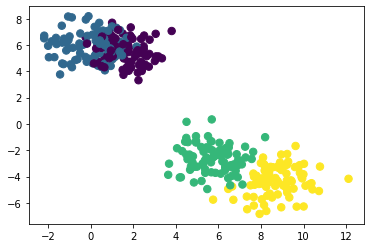

In [152]:
plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [153]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, stratify=y, test_size=0.3, random_state=2111111535)

In [154]:
# 투표분류기 생성1
# 직접투표 hardvoting : 모든 분류기가 클래스를 예측해서 개별분류기의 최빈값을 계산하고, 빈도값이 높은 클래슬ㄹ 채택

In [155]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC()

In [156]:
# 투표분류기 정의
# voting : 투표방식 지정 (soft/hard)
# estimators : 투표분류기에 사용할 개별 분류기 지정
voteclf = VotingClassifier(voting='hard', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf)])

In [157]:
# 훈련 및 평가
for cf in (lcf, rfcf, svcf, voteclf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)
    
    print(cf.__class__.__name__, cf.score(Xtrain, ytrain), accuracy_score(ytest, pred)) # 분류기 이름과 정확도 출력

LogisticRegression 0.8816326530612245 0.9428571428571428
RandomForestClassifier 1.0 0.9047619047619048
SVC 0.8693877551020408 0.9428571428571428
VotingClassifier 0.8857142857142857 0.9333333333333333


In [158]:
# 결정영역 시각화
import mldlpy3

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


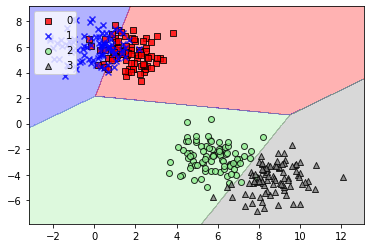

In [159]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


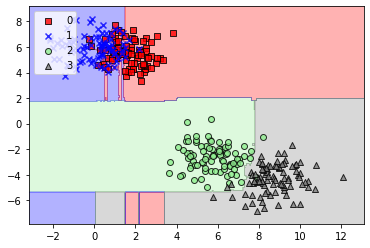

In [160]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


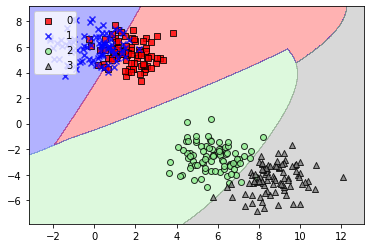

In [161]:
mldlpy3.plot_decision_regions(X, y, svcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


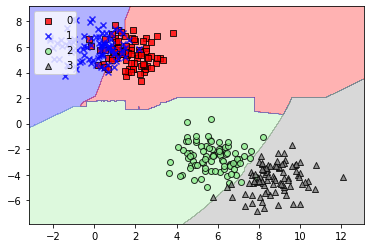

In [162]:
mldlpy3.plot_decision_regions(X, y, voteclf)

In [163]:
# 투표 분류기 생성 2
# 간접투표softviting : 모든 분류기가 클래스의 확률을 예측해서 개별 분류기의 평균을 계산하고, 확률이 높은 클래스를 채택

In [164]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
svcf = SVC(probability=True) # 확률예측

In [165]:
voteclf = VotingClassifier(voting='soft', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf)])

In [166]:
# 훈련 및 평가
for cf in (lcf, rfcf, svcf, voteclf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict_proba(Xtest)
    
    print(cf.__class__.__name__, cf.score(Xtrain, ytrain),cf.score(Xtest, ytest)) # 분류기 이름과 정확도 출력

LogisticRegression 0.8816326530612245 0.9428571428571428
RandomForestClassifier 1.0 0.9047619047619048
SVC 0.8693877551020408 0.9428571428571428
VotingClassifier 0.9306122448979591 0.9333333333333333


/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


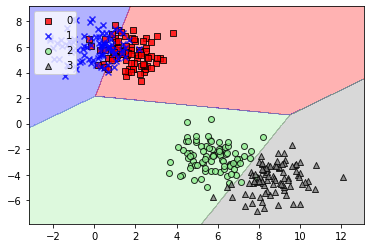

In [167]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


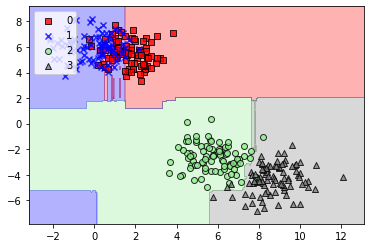

In [168]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


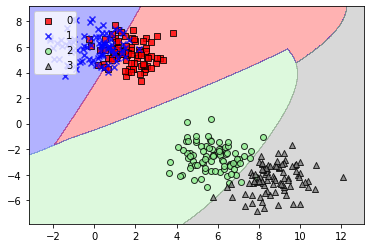

In [169]:
mldlpy3.plot_decision_regions(X, y, svcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


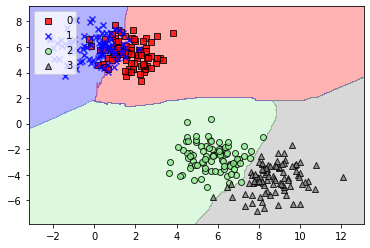

In [170]:
mldlpy3.plot_decision_regions(X, y, voteclf)

In [171]:
# 테스트용 데이터 생성 및 시각화 2
X,y = make_moons(n_samples=250, noise=0.05, random_state=2111111615)

In [172]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
kcf = KNeighborsClassifier()
svcf = SVC()

In [173]:
voteclf = VotingClassifier(voting='hard', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf),('kcf',kcf)])

In [174]:
# 훈련 및 평가
for cf in (lcf, rfcf, svcf, voteclf,kcf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)
    
    print(cf.__class__.__name__, cf.score(Xtrain, ytrain),cf.score(Xtest, ytest)) # 분류기 이름과 정확도 출력

LogisticRegression 0.8816326530612245 0.9428571428571428
RandomForestClassifier 1.0 0.8952380952380953
SVC 0.8693877551020408 0.9428571428571428
VotingClassifier 0.9142857142857143 0.9333333333333333
KNeighborsClassifier 0.9102040816326531 0.8857142857142857


In [175]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, stratify=y, test_size=0.3, random_state=2111111615)

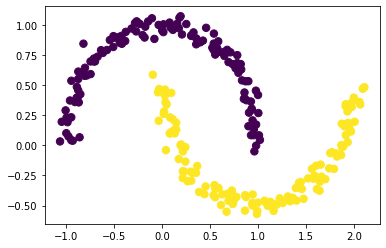

In [176]:
plt.scatter(X[:,0], X[:,1], c=y, s=55)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


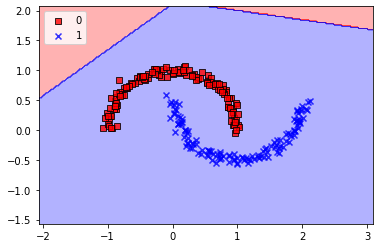

In [177]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


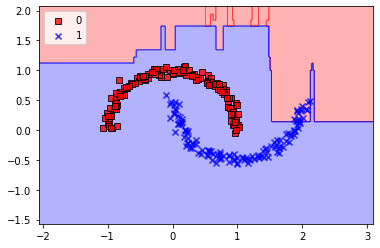

In [178]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


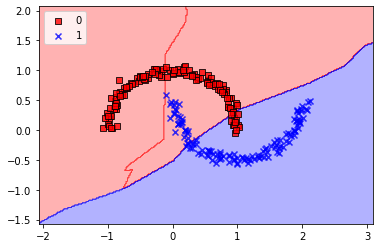

In [179]:
mldlpy3.plot_decision_regions(X, y, kcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


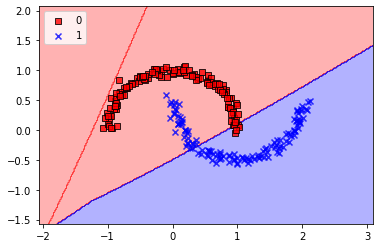

In [180]:
mldlpy3.plot_decision_regions(X, y, svcf)

In [181]:
# 테스트용 데이터 생성 및 시각화 3
X,y = make_circles(n_samples=250, noise=0.05, factor=0.7, random_state=2111111615)

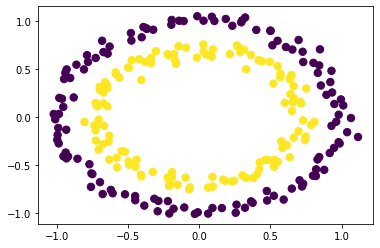

In [182]:
plt.scatter(X[:,0], X[:,1], c=y, s=55)

In [183]:
# 데이터 분할
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, stratify=y, test_size=0.3, random_state=2111111615)

In [184]:
lcf = LogisticRegression(max_iter=1000)
rfcf = RandomForestClassifier()
kcf = KNeighborsClassifier()
svcf = SVC()

In [185]:
voteclf = VotingClassifier(voting='hard', estimators=[('lr',lcf),('rf',rfcf),('sv',svcf),('kcf',kcf)])

In [186]:
# 훈련 및 평가
for cf in (lcf, rfcf, svcf, voteclf,kcf):
    cf.fit(Xtrain, ytrain)
    pred = cf.predict(Xtest)
    
    print(cf.__class__.__name__, cf.score(Xtrain, ytrain),cf.score(Xtest, ytest)) # 분류기 이름과 정확도 출력

LogisticRegression 0.5314285714285715 0.48
RandomForestClassifier 1.0 0.92
SVC 1.0 1.0
VotingClassifier 1.0 0.9733333333333334
KNeighborsClassifier 1.0 0.9733333333333334


/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


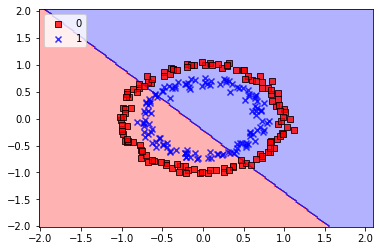

In [187]:
mldlpy3.plot_decision_regions(X, y, lcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


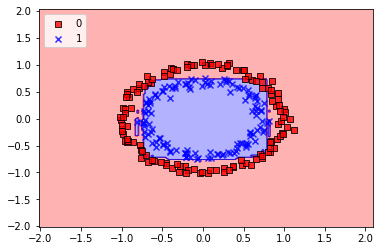

In [188]:
mldlpy3.plot_decision_regions(X, y, rfcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


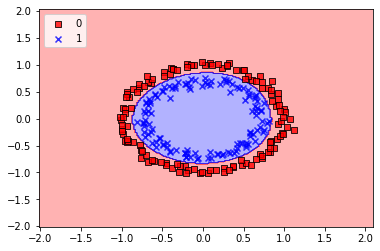

In [189]:
mldlpy3.plot_decision_regions(X, y, svcf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


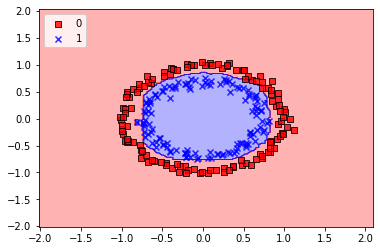

In [190]:
mldlpy3.plot_decision_regions(X, y, voteclf)

/home/hadoop/machinelearning/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


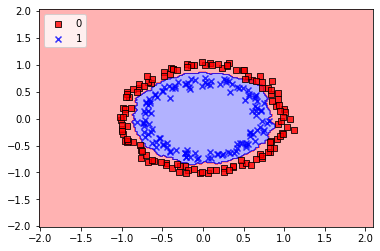

In [191]:
mldlpy3.plot_decision_regions(X, y, kcf)